In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import geojson
import geopandas as gpd

In [164]:
# Read data
daily_economic = pd.read_csv("../data/local_data/old/daily_dataset_economic_activity.csv", encoding='latin1') # Latin encoding because accent marks give errors 
daily_economic.info()

print("")
daily = pd.read_csv("../data/local_data/old/daily_dataset.csv", encoding='latin1')
daily.info()

print("")
general = pd.read_csv("../data/local_data/old/dades_datachallenge.csv", encoding='latin1')
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54441 entries, 0 to 54440
Data columns (total 8 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   Districte/Distrito/District                                                                   54441 non-null  object
 1   Municipi/Municipio/Municipality                                                               54441 non-null  object
 2   Data/Fecha/Date                                                                               54441 non-null  object
 3   Ús/Uso/Use                                                                                    54441 non-null  object
 4   Activitat econòmica/Actividad económica/Economic activity                                     54441 non-null  object
 5   Descripció activitat econòmica/De

In [165]:
daily.columns

Index(['Secció censal/Sección censal/Census section',
       'Districte/Distrito/District', 'Municipi/Municipio/Municipality',
       'Data/Fecha/Date', 'Ús/Uso/Use',
       'Nombre de comptadors/Número de contadores/Number of meters',
       'Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)'],
      dtype='object')

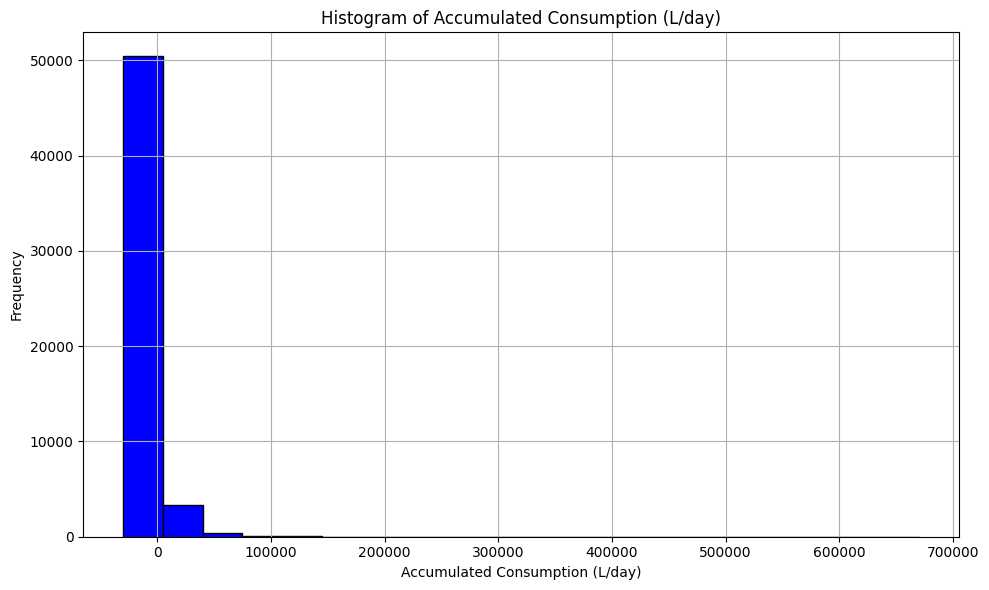

In [166]:
# Create a histogram for the 'Accumulated consumption (L/day)' column
plt.figure(figsize=(10, 6))
plt.hist(daily_economic['Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Accumulated Consumption (L/day)')
plt.xlabel('Accumulated Consumption (L/day)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

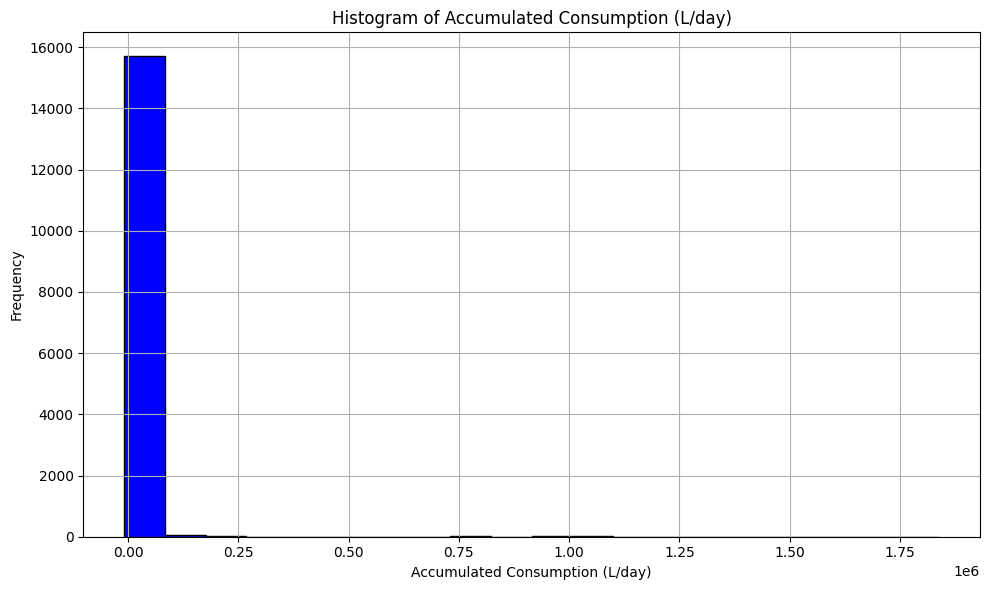

In [167]:
# Create a histogram for the 'Accumulated consumption (L/day)' column
plt.figure(figsize=(10, 6))
plt.hist(daily['Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Accumulated Consumption (L/day)')
plt.xlabel('Accumulated Consumption (L/day)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

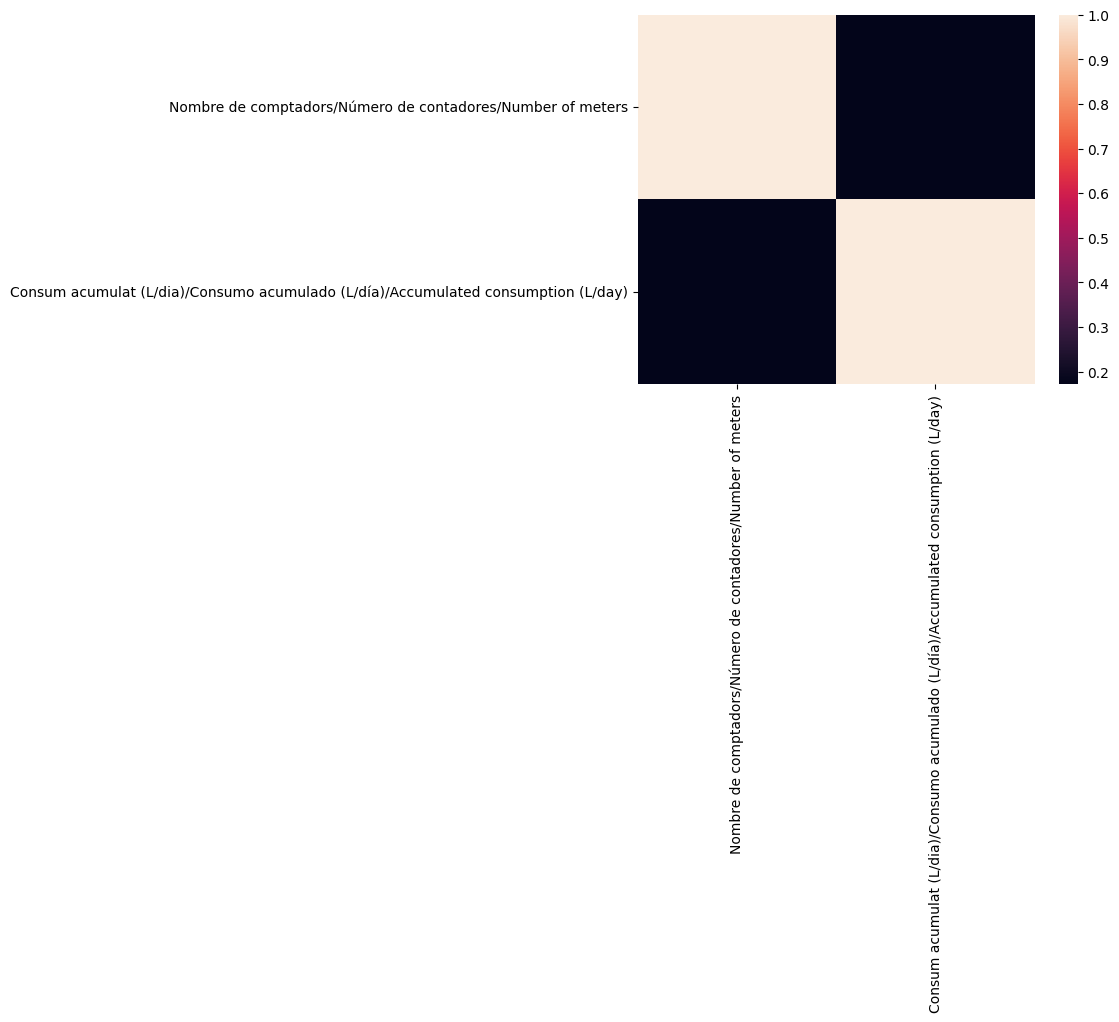

In [168]:
sns.heatmap(daily_economic.corr(numeric_only=True))

In [169]:
daily.corr(numeric_only=True)

Nombre de comptadors/Número de contadores/Number of meters  \
Nombre de comptadors/Número de contadores/Numbe...                                           1.000000            
Consum acumulat (L/dia)/Consumo acumulado (L/dí...                                           0.014837            

                                                    Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)  
Nombre de comptadors/Número de contadores/Numbe...                                           0.014837                                  
Consum acumulat (L/dia)/Consumo acumulado (L/dí...                                           1.000000

In [170]:
general.corr(numeric_only=True)

Dietre/Dietro/Diameter  \
Dietre/Dietro/Diameter                                  1.000000   
ndex lectura/ndice lectura/Reading index                0.987545   
Unnamed: 7                                                   NaN   

                                          ndex lectura/ndice lectura/Reading index  \
Dietre/Dietro/Diameter                                                    0.987545   
ndex lectura/ndice lectura/Reading index                                  1.000000   
Unnamed: 7                                                                     NaN   

                                          Unnamed: 7  
Dietre/Dietro/Diameter                           NaN  
ndex lectura/ndice lectura/Reading index         NaN  
Unnamed: 7                                       NaN

Index(['Identificador comptador/Identificador contador/Meter identifier',
       'Tecnologia/TecnologoTechnology', '³/Uso/Use',
       'Tipus habitatge/Tipo vivienda/Housing type', 'Dietre/Dietro/Diameter',
       'Data/Fecha/Date', 'ndex lectura/ndice lectura/Reading index',
       'Unnamed: 7'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 8547 entries, 0 to 8546
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Identificador comptador/Identificador contador/Meter identifier  8547 non-null   object        
 1   Tecnologia/TecnologoTechnology                                   8547 non-null   object        
 2   ³/Uso/Use                                                        8547 non-null   object        
 3   Tipus habitatge/Tipo vivienda/Housing type                       854

/var/folders/t1/rkwffv314k333khdlgxlw40m0000gn/T/ipykernel_66606/399797010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example["Data/Fecha/Date"] = pd.to_datetime(example["Data/Fecha/Date"], format='%d/%m/%Y %H:%M')


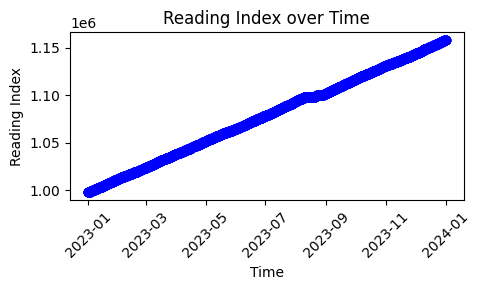

In [171]:
example = general[general["Identificador comptador/Identificador contador/Meter identifier"] == "9c0276bdbfb281af5263c50c8e57bda04c5c7a682461cbde28307243a778bc91"]

print(example.columns)

example["Data/Fecha/Date"] = pd.to_datetime(example["Data/Fecha/Date"], format='%d/%m/%Y %H:%M')

example.info()

plt.figure(figsize=(5, 3))
plt.plot(example['Data/Fecha/Date'], example['ndex lectura/ndice lectura/Reading index'], marker='o', linestyle='-', color='b')

# Labeling the axes
plt.xlabel('Time')
plt.ylabel('Reading Index')
plt.title('Reading Index over Time')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/t1/rkwffv314k333khdlgxlw40m0000gn/T/ipykernel_66606/994006511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example["Data/Fecha/Date"] = pd.to_datetime(example["Data/Fecha/Date"], format='%d/%m/%Y %H:%M')


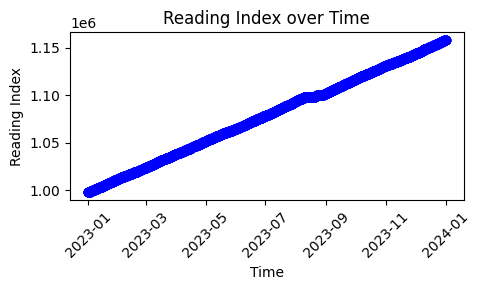

/var/folders/t1/rkwffv314k333khdlgxlw40m0000gn/T/ipykernel_66606/994006511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example["Data/Fecha/Date"] = pd.to_datetime(example["Data/Fecha/Date"], format='%d/%m/%Y %H:%M')


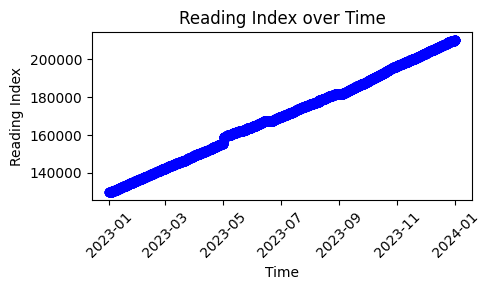

/var/folders/t1/rkwffv314k333khdlgxlw40m0000gn/T/ipykernel_66606/994006511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example["Data/Fecha/Date"] = pd.to_datetime(example["Data/Fecha/Date"], format='%d/%m/%Y %H:%M')


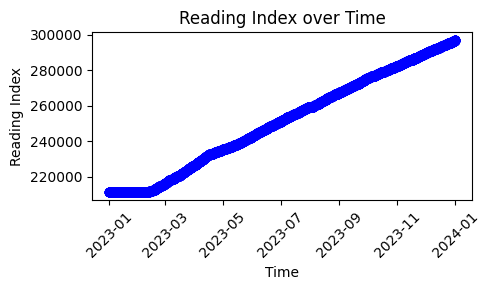

/var/folders/t1/rkwffv314k333khdlgxlw40m0000gn/T/ipykernel_66606/994006511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example["Data/Fecha/Date"] = pd.to_datetime(example["Data/Fecha/Date"], format='%d/%m/%Y %H:%M')


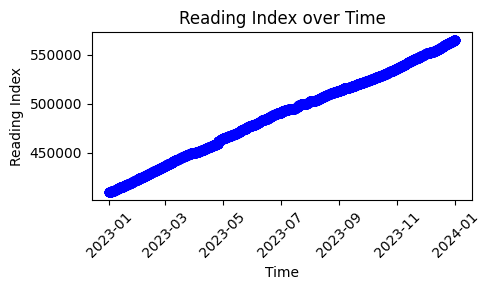

/var/folders/t1/rkwffv314k333khdlgxlw40m0000gn/T/ipykernel_66606/994006511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example["Data/Fecha/Date"] = pd.to_datetime(example["Data/Fecha/Date"], format='%d/%m/%Y %H:%M')


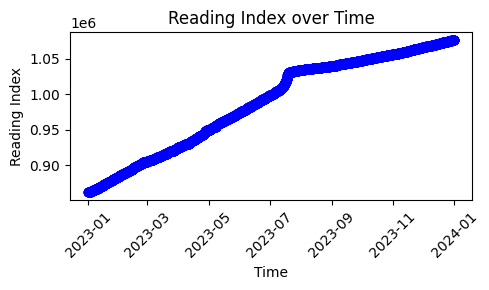

In [172]:
for i in range(5):
    unique_id = general["Identificador comptador/Identificador contador/Meter identifier"].unique()
    example = general[general["Identificador comptador/Identificador contador/Meter identifier"] == unique_id[i]]

    # print(example.columns)

    example["Data/Fecha/Date"] = pd.to_datetime(example["Data/Fecha/Date"], format='%d/%m/%Y %H:%M')

    # example.info()

    plt.figure(figsize=(5, 3))
    plt.plot(example['Data/Fecha/Date'], example['ndex lectura/ndice lectura/Reading index'], marker='o', linestyle='-', color='b')

    # Labeling the axes
    plt.xlabel('Time')
    plt.ylabel('Reading Index')
    plt.title('Reading Index over Time')

    # Show the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [173]:
daily.columns

Index(['Secció censal/Sección censal/Census section',
       'Districte/Distrito/District', 'Municipi/Municipio/Municipality',
       'Data/Fecha/Date', 'Ús/Uso/Use',
       'Nombre de comptadors/Número de contadores/Number of meters',
       'Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)'],
      dtype='object')

In [174]:
print(daily["Districte/Distrito/District"].unique())

['  ' '03' '02' '10' '01' '04' '05' '06']


In [175]:
# Group by Municipality and Use, and calculate the mean of Accumulated consumption
mean_consumption = daily.groupby(['Districte/Distrito/District', 'Ús/Uso/Use'])['Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)'].mean().reset_index()

mean_consumption.head()

Districte/Distrito/District                        Ús/Uso/Use  \
0                                Comercial/Comercial/Commercial   
1                                   Domèstic/Doméstico/Domestic   
2                              Industrial/Industrial/Industrial   
3                          01    Comercial/Comercial/Commercial   
4                          01       Domèstic/Doméstico/Domestic   

   Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)  
0                                         446.516129                                  
1                                        4705.645161                                  
2                                       30026.612903                                  
3                                        5116.087333                                  
4                                       10612.754524

In [176]:
chart = alt.Chart(mean_consumption).mark_bar().encode(
    x='Districte/Distrito/District:N',
    y='Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day):Q',
    color='Ús/Uso/Use:N',
    column='Ús/Uso/Use:N',
    tooltip=['Districte/Distrito/District', 'Ús/Uso/Use', 'Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)']
).properties(
    title='Mean Accumulated Consumption by District and Use'
).interactive()

chart

alt.Chart(...)

# New Dataset

In [177]:
# Read data
daily_economic = pd.read_csv("../data/local_data/daily_dataset_economic_activity.csv", encoding='latin1') # Latin encoding because accent marks give errors 
daily_economic.rename(columns={
    daily_economic.columns[0]: 'District',
    daily_economic.columns[1]: 'Municipality',
    daily_economic.columns[2]: 'Date',
    daily_economic.columns[3]: 'Use',
    daily_economic.columns[4]: 'Economic Activity',
    daily_economic.columns[5]: 'Economic Activity Description',
    daily_economic.columns[6]: 'Number of Meters',
    daily_economic.columns[7]: 'Accumulated Consumption'
}, inplace=True)
daily_economic.info()

print("")
daily = pd.read_csv("../data/local_data/daily_dataset.csv", encoding='latin1')
daily.rename(columns={
    daily.columns[0]: 'Census Section',
    daily.columns[1]: 'District',
    daily.columns[2]: 'Municipality',
    daily.columns[3]: 'Date',
    daily.columns[4]: 'Use',
    daily.columns[5]: 'Number of Meters',
    daily.columns[6]: 'Accumulated Consumption'
}, inplace=True)
daily.info()


/var/folders/t1/rkwffv314k333khdlgxlw40m0000gn/T/ipykernel_66606/856753606.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  daily_economic = pd.read_csv("../data/local_data/daily_dataset_economic_activity.csv", encoding='latin1') # Latin encoding because accent marks give errors


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833423 entries, 0 to 7833422
Data columns (total 8 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   District                       object
 1   Municipality                   object
 2   Date                           object
 3   Use                            object
 4   Economic Activity              object
 5   Economic Activity Description  object
 6   Number of Meters               int64 
 7   Accumulated Consumption        int64 
dtypes: int64(2), object(6)
memory usage: 478.1+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3574962 entries, 0 to 3574961
Data columns (total 7 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Census Section           object
 1   District                 object
 2   Municipality             object
 3   Date                     object
 4   Use                      object
 5   Number of Meters         int6

/var/folders/t1/rkwffv314k333khdlgxlw40m0000gn/T/ipykernel_66606/856753606.py:16: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  daily = pd.read_csv("../data/local_data/daily_dataset.csv", encoding='latin1')


In [178]:
daily_economic.head()

District Municipality        Date                             Use  \
0        1    BARCELONA  2021-01-01  Comercial/Comercial/Commercial   
1        1    BARCELONA  2021-01-01  Comercial/Comercial/Commercial   
2        1    BARCELONA  2021-01-01  Comercial/Comercial/Commercial   
3        1    BARCELONA  2021-01-01  Comercial/Comercial/Commercial   
4        1    BARCELONA  2021-01-01  Comercial/Comercial/Commercial   

  Economic Activity               Economic Activity Description  \
0             A/011                Directors de cinema i teatre   
1             A/012                       Ajudants de direcciÃ³   
2             A/015       Operadors cameres cinema, tv i vÃ­deo   
3             A/019  Altres activ. cinema, teatre, circ n.c.a.a   
4             A/021                     Directors coreogrÃ fics   

   Number of Meters  Accumulated Consumption  
0                 1                        0  
1                 1                      547  
2                 1                        0  
3                 2                       13  
4                 1                        0

In [179]:
daily.head()

Census Section District Municipality        Date  \
0      801501001        1     BADALONA  2021-05-26   
1      801501001        1     BADALONA  2021-05-26   
2      801501001        1     BADALONA  2021-05-27   
3      801501001        1     BADALONA  2021-05-27   
4      801501001        1     BADALONA  2021-05-28   

                              Use  Number of Meters  Accumulated Consumption  
0  Comercial/Comercial/Commercial                12                      843  
1   DomÃ¨stic/DomÃ©stico/Domestic               161                     4891  
2  Comercial/Comercial/Commercial                12                     2173  
3   DomÃ¨stic/DomÃ©stico/Domestic               173                    15458  
4  Comercial/Comercial/Commercial                12                     1836

In [180]:
# Group by Municipality and calculate the sum of Accumulated Consumption
consumption_by_municipality = daily.groupby('Municipality', as_index=False)['Accumulated Consumption'].sum()


# Create a bar chart for Accumulated Consumption by Municipality
chart = alt.Chart(consumption_by_municipality).mark_bar().encode(
    x='Municipality:N',
    y='Accumulated Consumption:Q',
    tooltip=['Municipality', 'Accumulated Consumption']
).properties(
    title='Accumulated Consumption by Municipality'
).interactive()

chart

alt.Chart(...)

In [181]:
daily_economic['Municipality'].unique()

array(['BARCELONA', "L'HOSPITALET LLOBR."], dtype=object)

In [182]:
daily['Municipality'].unique()

array(['BADALONA', 'BARCELONA', "L'HOSPITALET LLOBR.", 'PALLEJA',
       'EL PAPIOL'], dtype=object)

In [183]:
# Read the parquet file into a pandas dataframe
hour_df = pd.read_parquet('../data/local_data/hours_lecture.parquet')

hour_df.rename(columns={
    hour_df.columns[0]: 'Policy',
    hour_df.columns[1]: 'Technology',
    hour_df.columns[2]: 'Counter Diameter',
    hour_df.columns[3]: 'Use',
    hour_df.columns[4]: 'Type of Housing',
    hour_df.columns[5]: 'Date',
    hour_df.columns[6]: 'Reading Index'
}, inplace=True)

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48806647 entries, 0 to 48806646
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Policy            object 
 1   Technology        object 
 2   Counter Diameter  float64
 3   Use               object 
 4   Type of Housing   object 
 5   Date              object 
 6   Reading Index     float64
dtypes: float64(2), object(5)
memory usage: 2.5+ GB


In [184]:
hour_df.head()

Policy Technology  \
0  9a588b6ba55d2c7baed4c039328f3bfb3fbab2c78dbe30...          R   
1  9a588b6ba55d2c7baed4c039328f3bfb3fbab2c78dbe30...          R   
2  9a588b6ba55d2c7baed4c039328f3bfb3fbab2c78dbe30...          R   
3  9a588b6ba55d2c7baed4c039328f3bfb3fbab2c78dbe30...          R   
4  9a588b6ba55d2c7baed4c039328f3bfb3fbab2c78dbe30...          R   

   Counter Diameter        Use Type of Housing                 Date  \
0              15.0  COMERCIAL               B  2023-01-01 00:00:00   
1              15.0  COMERCIAL               B  2023-01-01 01:00:00   
2              15.0  COMERCIAL               B  2023-01-01 02:00:00   
3              15.0  COMERCIAL               B  2023-01-01 03:00:00   
4              15.0  COMERCIAL               B  2023-01-01 04:00:00   

   Reading Index  
0       344207.0  
1       344208.0  
2       344208.0  
3       344208.0  
4       344208.0

In [185]:
df_barcelona = daily_economic[daily_economic['Municipality'] == 'BARCELONA']

# Group by District and sum the Accumulated Consumption
consumption_by_district = df_barcelona.groupby('District', as_index=False)['Accumulated Consumption'].sum()

chart = alt.Chart(consumption_by_district).mark_bar(color="skyblue").encode(
    x=alt.X('District:N', title='District', sort='-y'),  # Sorting districts by consumption
    y=alt.Y('Accumulated Consumption:Q', title='Total Accumulated Consumption (L/day)'),
    tooltip=['District', 'Accumulated Consumption']
).properties(
    title='Accumulated Water Consumption by District in Barcelona'
).interactive()

chart

alt.Chart(...)

In [186]:
df_barcelona["Use"].unique()

array(['Comercial/Comercial/Commercial',
       'Industrial/Industrial/Industrial'], dtype=object)

In [187]:
daily_economic["Use"].unique()

array(['Comercial/Comercial/Commercial',
       'Industrial/Industrial/Industrial'], dtype=object)

In [188]:
barcelona_daily = daily[daily['Municipality'] == 'BARCELONA']
# Group by District and sum the Accumulated Consumption
consumption_by_district = barcelona_daily.groupby('District', as_index=False)['Accumulated Consumption'].sum()

chart = alt.Chart(consumption_by_district).mark_bar(color="skyblue").encode(
    x=alt.X('District:N', title='District', sort='-y'),  # Sorting districts by consumption
    y=alt.Y('Accumulated Consumption:Q', title='Total Accumulated Consumption (L/day)'),
    tooltip=['District', 'Accumulated Consumption']
).properties(
    title='Accumulated Water Consumption by District in Barcelona'
).interactive()

chart

alt.Chart(...)

In [189]:
# Group by Municipality and Use, and calculate the mean of Accumulated consumption
mean_consumption = df_barcelona.groupby(['District', 'Use'])['Accumulated Consumption'].mean().reset_index()

chart = alt.Chart(mean_consumption).mark_bar().encode(
    x='District:N',
    y='Accumulated Consumption:Q',
    color='Use:N',
    column='Use:N',
    tooltip=['District', 'Use', 'Accumulated Consumption']
).properties(
    title='Mean Accumulated Consumption by District and Use'
).interactive()

chart

alt.Chart(...)

In [190]:
daily['Date'] = pd.to_datetime(daily['Date'])
consumption_per_day = daily.groupby('Date', as_index=False)['Accumulated Consumption'].sum()
# Create a line chart to visualize total consumption per day
chart = alt.Chart(consumption_per_day).mark_line().encode(
    x=alt.X('Date:T', title='Date'),
    y=alt.Y('Accumulated Consumption:Q', title='Total Accumulated Consumption (L/day)'),
    tooltip=['Date', 'Accumulated Consumption']
).properties(
    title='Total Water Consumption per Day',
    width=800,
    height=400
).interactive()

chart

alt.Chart(...)

In [191]:
# Group by Date and Use, and sum the Accumulated Consumption
consumption_per_day_use = daily.groupby(['Date', 'Use'], as_index=False)['Accumulated Consumption'].sum()
# Create a layered line chart to visualize total consumption per day and use
chart = alt.Chart(consumption_per_day_use).mark_line().encode(
    x=alt.X('Date:T', title='Date'),
    y=alt.Y('Accumulated Consumption:Q', title='Total Accumulated Consumption (L/day)'),
    color='Use:N',  # Different colors for different 'Use' categories
    tooltip=['Date', 'Use', 'Accumulated Consumption']
).properties(
    title='Total Water Consumption per Day by Use',
    width=800,
    height=400
).interactive()

chart

alt.Chart(...)

In [192]:
df_filtered = daily[daily['Accumulated Consumption'] >= 0]
# Group by Date and Use, and sum the Accumulated Consumption, using the filtered dataframe
consumption_per_day_use_filtered = df_filtered.groupby(['Date', 'Use'], as_index=False)['Accumulated Consumption'].sum()
# Create a layered line chart to visualize total consumption per day and use without negative values
chart = alt.Chart(consumption_per_day_use_filtered).mark_line().encode(
    x=alt.X('Date:T', title='Date'),
    y=alt.Y('Accumulated Consumption:Q', title='Total Accumulated Consumption (L/day)'),
    color='Use:N',  # Different colors for different 'Use' categories
    tooltip=['Date', 'Use', 'Accumulated Consumption']
).properties(
    title='Total Water Consumption per Day by Use (Without Negative Values)',
    width=800,
    height=400
).interactive()

chart

alt.Chart(...)

In [27]:
district = gpd.read_file('../data/districts_geo.geojson')

In [194]:
# Displaying Chicago Wards map
barcelona_district = alt.Chart(district).mark_geoshape(
    fill='lightgray',
    stroke='black'
).encode(
    tooltip=["LITERAL", "NOM"]
).project(
    'mercator'
).properties(
    width=400,
    height=400,
    title="Barcelona District"
)

barcelona_district.display()

alt.Chart(...)

In [4]:
census = gpd.read_file('../data/census_geo.geojson')

In [7]:
barcelona_census = alt.Chart(census).mark_geoshape(
    fill='lightgray',
    stroke='black'
).encode(
    tooltip=["DISTRICTE", "SEC_CENS"]
).project(
    'mercator'
).properties(
    width=600,
    height=600,
    title="Barcelona Census"
)

barcelona_census.display()

alt.Chart(...)

In [33]:
df = pd.read_csv("..\data\local_data\merged_cleaned_data_NEW.csv")


# Add leading zeros to the 'District' column in df to match the format in 'district'
df['District'] = df['District'].apply(lambda x: f"{int(x):02d}")
df_aggregated = df.groupby('District')['Accumulated Consumption'].sum().reset_index()

# Merge geospatial data with the aggregated data by 'District'
census_consumption = district.merge(df_aggregated, left_on="DISTRICTE", right_on="District")




In [36]:
zoom = alt.selection_interval(bind='scales')  # This allows zooming and panning

barcelona_district_consumption = alt.Chart(census_consumption).mark_geoshape(
).encode(
    color=alt.Color(
        'Accumulated Consumption:Q',
        scale=alt.Scale(scheme='viridis'),  # You can choose other color schemes like 'inferno', 'plasma', etc.
        legend=alt.Legend(title="Accumulated Consumption")
    ),
    tooltip=["NOM", "District", "Accumulated Consumption"]  # Tooltip to show district name and consumption
).project(
    'mercator'
).add_selection(
    zoom
).properties(
    width=600,
    height=600,
    title="Barcelona Districts - Accumulated Consumption"
)

barcelona_district_consumption.display()

c:\Users\Usuari\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)